## Set up
First you need to install GraphDB locally on you machine


In [ ]:
from rdflib import ConjunctiveGraph
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np


import pandas as pd

def remoteQuery(query, endpoint):
    endpoint.setQuery(query)
    try:
        result = endpoint.queryAndConvert()
        pd.set_option("display.max_rows",None,"display.max_colwidth",6000,"display.width",6000,)
        df = pd.DataFrame(result['results']['bindings'])
        df = df.applymap(lambda x: x['value'])
        return df
        #return (result['results']['bindings'])
    except Exception as e:
        print(e)



### With a GraphDB SPARQL endpoint


In [ ]:
ep_biotools = SPARQLWrapper("http://llamothe-HP-EliteBook-x360-1040-G8-Notebook-PC:7200/repositories/biotools")
ep_biotools.setReturnFormat(JSON)

## query to get top 6 operation reprented in bio.tools

In [ ]:
q= """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT  ?operation (COUNT(?operation) as ?count) ?label WHERE {
?x rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation .
   ?operation rdfs:label ?label . 
} GROUP BY ?operation ?label
ORDER BY DESC(?count)
LIMIT 5
"""

In [ ]:
print(f"nb data/operation with has_topic property: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
remoteQuery(query=q, endpoint=ep_biotools)

## query to get the top 100 tools and their associated EDAM def and synonyms

In [ ]:
q= """
SELECT  * WHERE {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?feature .

?feature  <http://www.geneontology.org/formats/oboInOwl#hasDefinition> ?def ; 
         <http://www.geneontology.org/formats/oboInOwl#hasExactSynonym> ?syn .
} limit 100
"""
print(f"nb data/operation with has_topic property: {len(remoteQuery(query=q, endpoint=ep_biotools))}")
remoteQuery(query=q, endpoint=ep_biotools)

## *Has_topic* comparison

In [ ]:
q= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT ?biotools_id ?name ?operation ?topic WHERE {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation ;
   <http://schema.org/applicationSubCategory> ?topic .


} 
# limit 50
"""


The above query returns the relation between a topic and a operation represented in bio.tools via the tools annotation

In [ ]:
res_q=len(remoteQuery(query=q, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_q}")

In [ ]:
q2= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT  ?biotools_id ?name ?operation ?topic WHERE {
# SELECT DISTINCT ?operation ?topic WHERE {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation ;
   <http://schema.org/applicationSubCategory> ?topic .


?operation rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:has_topic ; 
   owl:someValuesFrom ?topic.

} 
# limit 50
"""


The above query returns the relation between a topic and a operation represented in bio.tools  via the tools annotation, that are validated in edam via the "has_topic" restriction in EDAM 

In [ ]:
res_q2=len(remoteQuery(query=q2, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_q2}")

In [ ]:
remoteQuery(query=q2, endpoint=ep_biotools)

In [ ]:
q3= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT  ?biotools_id ?name ?operation ?topic WHERE {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation ;
   <http://schema.org/applicationSubCategory> ?topic .

FILTER NOT EXISTS {    
?operation rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:has_topic ; 
   owl:someValuesFrom ?topic.}

} 
# limit 60
"""

The above query returns the relation between a topic and a operation represented in bio.tools  via the tools annotation, that are NOT validated in edam via the "has_topic" restriction in EDAM 

In [ ]:
res_q3=len(remoteQuery(query=q3, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_q3}")

In [ ]:
remoteQuery(query=q3, endpoint=ep_biotools)

<function matplotlib.pyplot.show(close=None, block=None)>

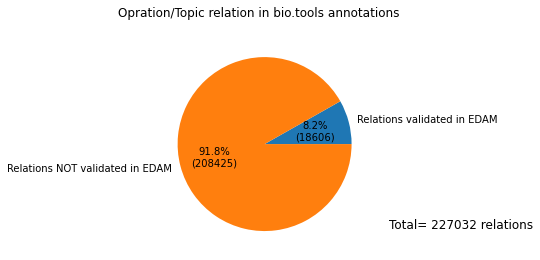

In [67]:
has_topic = np.array([res_q2,res_q3])
labels=["Relations validated in EDAM","Relations NOT validated in EDAM"]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
fig.suptitle("Opration/Topic relation in bio.tools annotations")

textstr=f"Total= {res_q} relations"
fig.text(0.8, 0.2, textstr, fontsize=12,
        verticalalignment='bottom')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(has_topic, labels=labels,autopct=lambda pct: func(pct, [res_q2,res_q3]))
plt.show

In [63]:
qbis= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT ?operation ?topic WHERE {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation ;
   <http://schema.org/applicationSubCategory> ?topic .


} 
# limit 60
"""


In [64]:
res_qbis=len(remoteQuery(query=qbis, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_qbis}")

nb data/operation with has_topic property: 33885


In [ ]:
q4= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT ?operation ?topic WHERE {
?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation ;
   <http://schema.org/applicationSubCategory> ?topic .


?operation rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:has_topic ; 
   owl:someValuesFrom ?topic.

} 
# limit 50
"""


The above query returns the UNIQUES relation between a topic and a operation represented in bio.tools via the tools annotation (meaning if different tools have both operation A and topic B as anootation, the duplicate is not counted), that are  validated in edam via the "has_topic" restriction in EDAM 

In [ ]:
res_q4=len(remoteQuery(query=q4, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_q4}")

nb data/operation with has_topic property: 749


In [ ]:
q5= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT ?operation ?topic WHERE {

?biotools_id rdf:type <http://schema.org/SoftwareApplication> ;
   <http://schema.org/name> ?name ; 
   <http://schema.org/featureList> ?operation ;
   <http://schema.org/applicationSubCategory> ?topic .

FILTER NOT EXISTS {    
?operation rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:has_topic ; 
   owl:someValuesFrom ?topic.}

} 
# limit 50
"""

The above query returns the UNIQUES relation between a topic and a operation represented in bio.tools via the tools annotation (meaning if different tools have both operation A and topic B as anootation, the duplicate is not counted), that are NOT validated in edam via the "has_topic" restriction in EDAM 

In [65]:
res_q5=len(remoteQuery(query=q5, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_q5}")

nb data/operation with has_topic property: 33136


<function matplotlib.pyplot.show(close=None, block=None)>

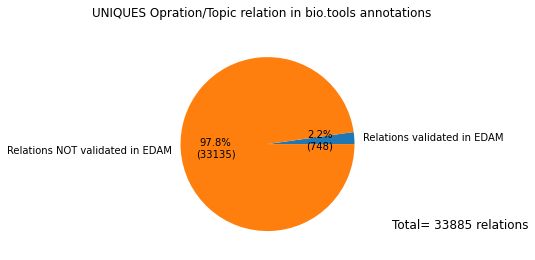

In [71]:
has_topic = np.array([res_q4,res_q5])
labels=["Relations validated in EDAM","Relations NOT validated in EDAM"]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
fig.suptitle("UNIQUES Opration/Topic relation in bio.tools annotations")

textstr=f"Total= {res_qbis} relations"
fig.text(0.8, 0.2, textstr, fontsize=12,
        verticalalignment='bottom')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(has_topic, labels=labels,autopct=lambda pct: func(pct, [res_q4,res_q5]))
plt.show

In [72]:
q6= """
PREFIX edam:<http://edamontology.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT DISTINCT ?operation ?topic WHERE {
 
?operation rdfs:subClassOf ?restriction . 
?restriction rdf:type owl:Restriction ; 
   owl:onProperty  edam:has_topic ; 
   owl:someValuesFrom ?topic.

} 
# limit 50
"""

The above query returns the relation between a topic and a operation represented EDAm via has_topic restriction

In [73]:
res_q6=len(remoteQuery(query=q6, endpoint=ep_biotools))
print(f"nb data/operation with has_topic property: {res_q6}")

nb data/operation with has_topic property: 1208


<function matplotlib.pyplot.show(close=None, block=None)>

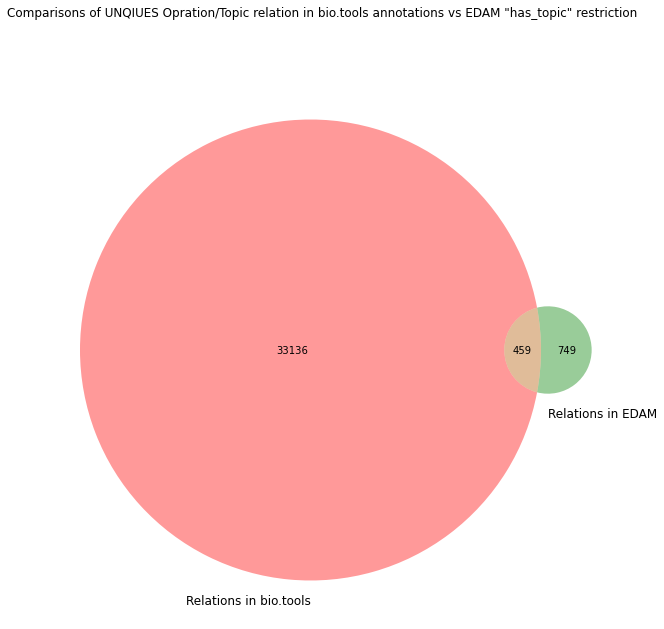

In [80]:
fig = plt.figure(figsize = (15, 10))

fig.patch.set_facecolor('xkcd:white')
fig.suptitle("Comparisons of UNQIUES Opration/Topic relation in bio.tools annotations vs EDAM \"has_topic\" restriction")

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

venn2(subsets=(res_qbis-res_q4,res_q4,res_q6-res_q4), set_labels=('Relations in bio.tools', 'Relations in EDAM'))
plt.show


## bio.tools missing data or format